# Programando el método de Runge-Kutta

## Breve introducción al método

### ¿Útil para qué?

Este método sirve para aproximar la solución del problema de valor inicial (i.e una ecuación diferencial con valor incial) del tipo

>  \begin{equation}
y'=f(t,y)\quad t\in[a,b]\quad y(a)=\alpha
\end{equation}

### ¿Cómo funciona?

* **INPUTS** $a,b$ los extremos del intervalo; $N$ cantidad de puntos en el intervalo; condición inicial $\alpha$
* **OUTPUT** Aproximación $w$ de la función $y$ en cada uno de los $N+1$ puntos del intervalo $[a,b]$.

> **PASO 2**: Para $i=1,\dots, N$ hacer Pasos 3-5
>> **PASO 3**: 
\begin{split}
\text{Definir}\quad &K_1=hf(t,w)\\
&K_2= hf\left(t+h/2, w+K_1/2\right)\\
&K_3= hf\left(t+h/2, w+K_2/2\right)\\
&K_4= hf\left(t+h/2, w+K_3\right)
\end{split}
>> **PASO 4**
\begin{split}
\text{Definir}\quad &w=w+\frac{K_1+2K_2+2K_3+K_4}{6} \quad\text{(se calcular $w_i$})\\
&t=a+ih\quad\text{(se calcula $t_i$})
\end{split}

> **PASO 5** Parar

**NOTA:** Este algoritmo se ha obtenido de [Numerical Analysis 9nth ed. pp 288-289](https://faculty.ksu.edu.sa/sites/default/files/numerical_analysis_9th.pdf)

## Programación

Añadimos las librerías necesarias

In [1]:
import numpy as np
import warnings
import math
from utils import *

warnings.filterwarnings("ignore")

Programamos el algortimo descrito arriba

In [2]:
def RK4(f,a,b,alpha,N):
    '''
    Runge-Kutta order four method to approximate the solution of an
    ordinary differential equation with an initial condition
    
    INPUTS:
    
    f(function)  : The function that defines the ordinary differential equation
    a(float)     : left extreme of the solution domain [a,b]
    b(float)     : right extreme of the solution domain [a,b]
    alpha(float) : initial condition y(a)=alpha
    N(integer)   : 
    
    OUTPUT:
    
    w(onedarray) : approximation of function y at N equally spaced point of [a,b]
    '''
    t=np.arange(a,b,step=1/N)
    h=t[1]-t[0]
    w=np.ones(len(t))
    w[0]=alpha
    for i in range(0,len(t)-1):
        K1= h*f(t[i],w[i])
        K2= h*f(t[i]+h/2, w[i]+K1/2)
        K3= h*f(t[i]+h/2, w[i]+K2/2)
        K4= h*f(t[i]+h, w[i]+K3)
        w[i+1]=w[i]+(K1+2*K2+2*K3+K4)/6
    return t,w 

Probando si el algoritmo resuelve la EDO siguiente:
    $$
    y'=y\quad y(0)=1
    $$
   la cual, si se resulve analíticamente, tiene por solución $y(t)=\exp(t)$

In [2]:
def f(t,y):
    return y

In [28]:
sol=RK4(f,0,2.1,alpha=1,N=2)
print(sol)
print(len(sol[0]))

(array([0. , 0.5, 1. , 1.5, 2. ]), array([1.        , 1.6484375 , 2.71734619, 4.47937536, 7.38397032]))
5


Podemos hacer una comparación gráfica entre la solución numérica y la solución analítica como sigue:

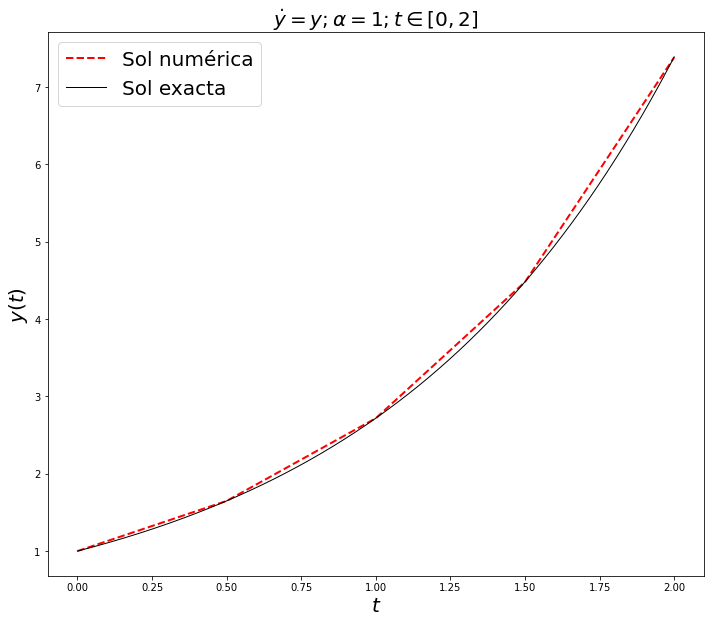

In [32]:
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
t=sol[0]
w=sol[1]
t1=np.linspace(0,2,1000)
y=np.exp(t1)
fig = plt.figure(figsize=(40,10))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='red', label="Sol numérica", linewidth=2)
plt.plot(t1,y,color='black', label="Sol exacta", linewidth=1)
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("$t$", fontsize=20)
plt.ylabel("$y(t)$", fontsize=20)
plt.title("$\dot{y}=y; \\alpha=1; t\in[0,2]$", fontsize=20)
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(prop={'size': 20})

y podemos calcular el error relativo entre la solución analítica y numérica en cada punto

In [61]:
# la siguiente función auxiliar ha sido extraida de las notas
from numpy import linalg as LA

def compute_error(obj,approx):
    '''
    Relative or absolute error between obj and approx.
    '''
    if LA.norm(obj) > np.nextafter(0,1):
        Err = LA.norm(obj-approx)/LA.norm(obj)
    else:
        Err = LA.norm(obj-approx)
    return Err

y vemos que la solución numérica es muy similar a la analítica, calculando el error relativo

In [7]:
compute_error(w,y)

5.872723347674721e-11

# Graficando el solido de revolución

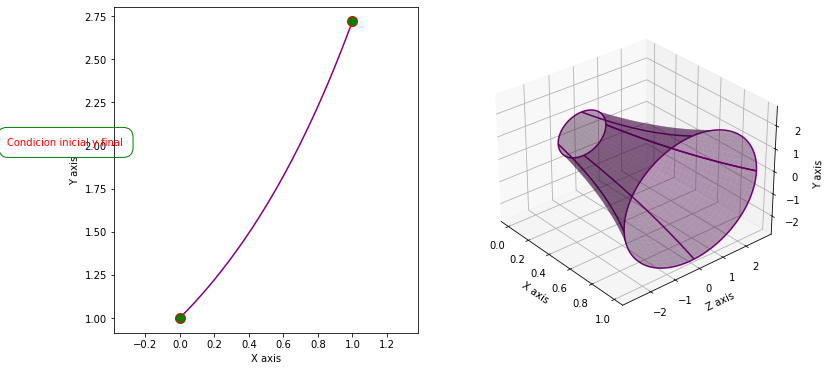

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

n = 100

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

#extremos del intervalo
a,b =0,1

#initial conditions
xa,xb= 1, math.exp(1)

#dominio de la funcion
t=sol[0]

#funcion solucion evaluada en cada t
y_t=sol[1]

#parametro 2 de la parametrizacion
theta = np.linspace(0, 2*np.pi, n)
#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)
#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

####Grafica de funcion a rotar
ax1.plot(t,y_t,'purple')
ax1.plot(a, xa,b,xb, marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="green", label='condicion final e inicial') #graficando condicion inicial y final

ax1.text(-1, 2, 'Condicion inicial y final', color='red', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round,pad=1'))

#### Grafica solido revolucion
ax2.plot_wireframe(T, Y, Z,rcount=4,ccount=1, color='purple') #mostrar las secciones del solido
ax2.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax2.view_init(elev=30, azim=-40) #para rotar la grafica

#etiquetar ejes:
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Z axis')
ax2.set_zlabel('Y axis')
ax1.axis('equal')
plt.show()

# Figura 1 del reporte

In [51]:
def g(t,y):
    return np.sqrt(4*y**2-4*y**4)/(2*y**2)

In [56]:
#extreme values
a,b =-1,0
alpha=0.01
sol2=RK4(g,a,b,alpha,N=1000)
sol2

(array([-1.   , -0.999, -0.998, ..., -0.002, -0.001,  0.   ]),
 array([0.01      , 0.05298033, 0.06930669, ..., 0.99999872, 0.99999977,
               nan]))

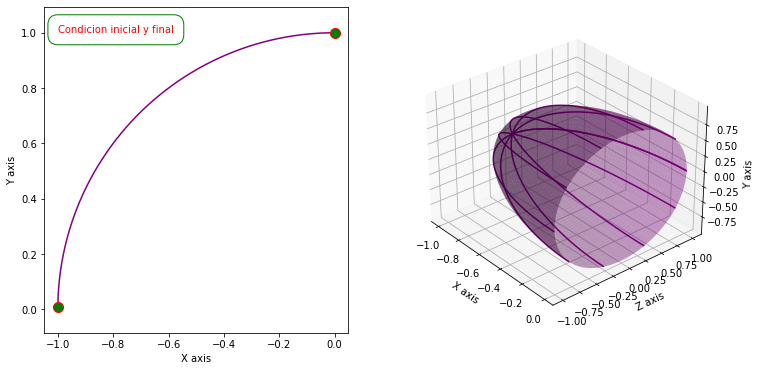

In [60]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

n = 100

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

#extremos del intervalo
a,b =-1,0

#initial conditions
xa, xb= 0.01, 1

#dominio de la funcion
t=sol2[0]

#funcion solucion evaluada en cada t
y_t=sol2[1]

#parametro 2 de la parametrizacion
theta = np.linspace(0, 2*np.pi, n)
#creamos una malla para t,theta
T, THETA = np.meshgrid(t, theta)
#REFERENCIA PARA MESHGRID: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#coordenadas del solido de revolucion
Y_T = np.ones((n, 1))*y_t #matrix whose rows are reapeted and equal to the solution vector
Y = Y_T*np.cos(THETA)
Z = Y_T*np.sin(THETA)

###GRAFICAS

####Grafica de funcion a rotar
ax1.plot(t,y_t,'purple')
ax1.plot(a, xa,b,xb, marker="o", markersize=10, markeredgecolor="red", 
         markerfacecolor="green", label='condicion final e inicial') #graficando condicion inicial y final

ax1.text(-1, xb, 'Condicion inicial y final', color='red', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round,pad=1'))

#### Grafica solido revolucion
ax2.plot_wireframe(T, Y, Z,rcount=10,ccount=1, color='purple') #mostrar las secciones del solido
ax2.plot_surface(T, Y, Z, color='purple', alpha=0.4)
ax2.view_init(elev=30, azim=-40) #para rotar la grafica

#etiquetar ejes:
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Z axis')
ax2.set_zlabel('Y axis')
ax1.axis('equal')
plt.show()

range(1, 10)